In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn xgboost cufflinks plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# Enable offline mode for Plotly
py.init_notebook_mode(connected=True)
cf.go_offline()
sns.set(style="darkgrid")


In [3]:
df=pd.read_csv("./dataset/final_data.csv")
df.head(10)

CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0         Health          29.979719                     17   
1           Arts          27.802640                      1   
2           Arts          86.820485                     14   
3        Science          35.038427                     17   
4    Programming          92.490647                     16   
5         Health          79.466129                     12   
6         Health          78.908724                     10   
7       Business          12.068237                     16   
8       Business          81.935709                      8   
9    Programming          83.394026                     15   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   
5                     7   70.233329       76.484023           0   
6                     2   86.836533       22.588896           1   
7                     3   61.553646       27.410991           1   
8                     4   90.264564       33.308437           0   
9                    10   63.956353       33.261300           1   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
5                 1  
6                 0  
7                 0  
8                 1  
9                 0

In [4]:
# Define encoding mappings
mappings = {
    'Health': 1,
    'Arts': 2,
    'Science': 3,
    'Programming': 4,
    'Business': 5
}

# Apply priority-based encoding mappings to the 'CourseCategory' column
df['CourseCategory'] = df['CourseCategory'].replace(mappings)

In [5]:
df.sample(10)

CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
3231               2          31.981616                      0   
4169               2          64.993772                     17   
5074               3          23.517377                     10   
3990               5           9.297035                     16   
539                3          21.491644                     10   
4890               3          31.467202                     20   
198                4          85.772228                      7   
4507               3          38.615656                     17   
1871               3          43.807240                     18   
1289               1          11.852874                     11   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
3231                     8   61.083131       58.619010           0   
4169                     7   61.591535       58.535539           0   
5074                     1   95.243509       53.994013           1   
3990                     1   69.973964       49.511247           0   
539                      9   51.112775       64.499764           0   
4890                     5   60.630597       30.364584           0   
198                      4   85.615444       23.626921           0   
4507                    10   75.020127       69.392898           0   
1871                     0   66.498248       11.586392           1   
1289                     2   84.668658       34.556492           0   

      CourseCompletion  
3231                 0  
4169                 0  
5074                 0  
3990                 0  
539                  1  
4890                 0  
198                  1  
4507                 1  
1871                 0  
1289                 0

In [6]:
df.describe().T.style.bar(subset=['mean'], color='#ff5733') \
    .background_gradient(subset=['std'], cmap='viridis') \
    .background_gradient(subset=['50%'], cmap='plasma')

In [7]:
#check the correlation between target and each of columns
df.corr()["CourseCompletion"]

CourseCategory           0.012604
TimeSpentOnCourse        0.186399
NumberOfVideosWatched    0.239476
NumberOfQuizzesTaken     0.291650
QuizScores               0.304706
CompletionRate           0.328800
DeviceType               0.008663
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

<Axes: >

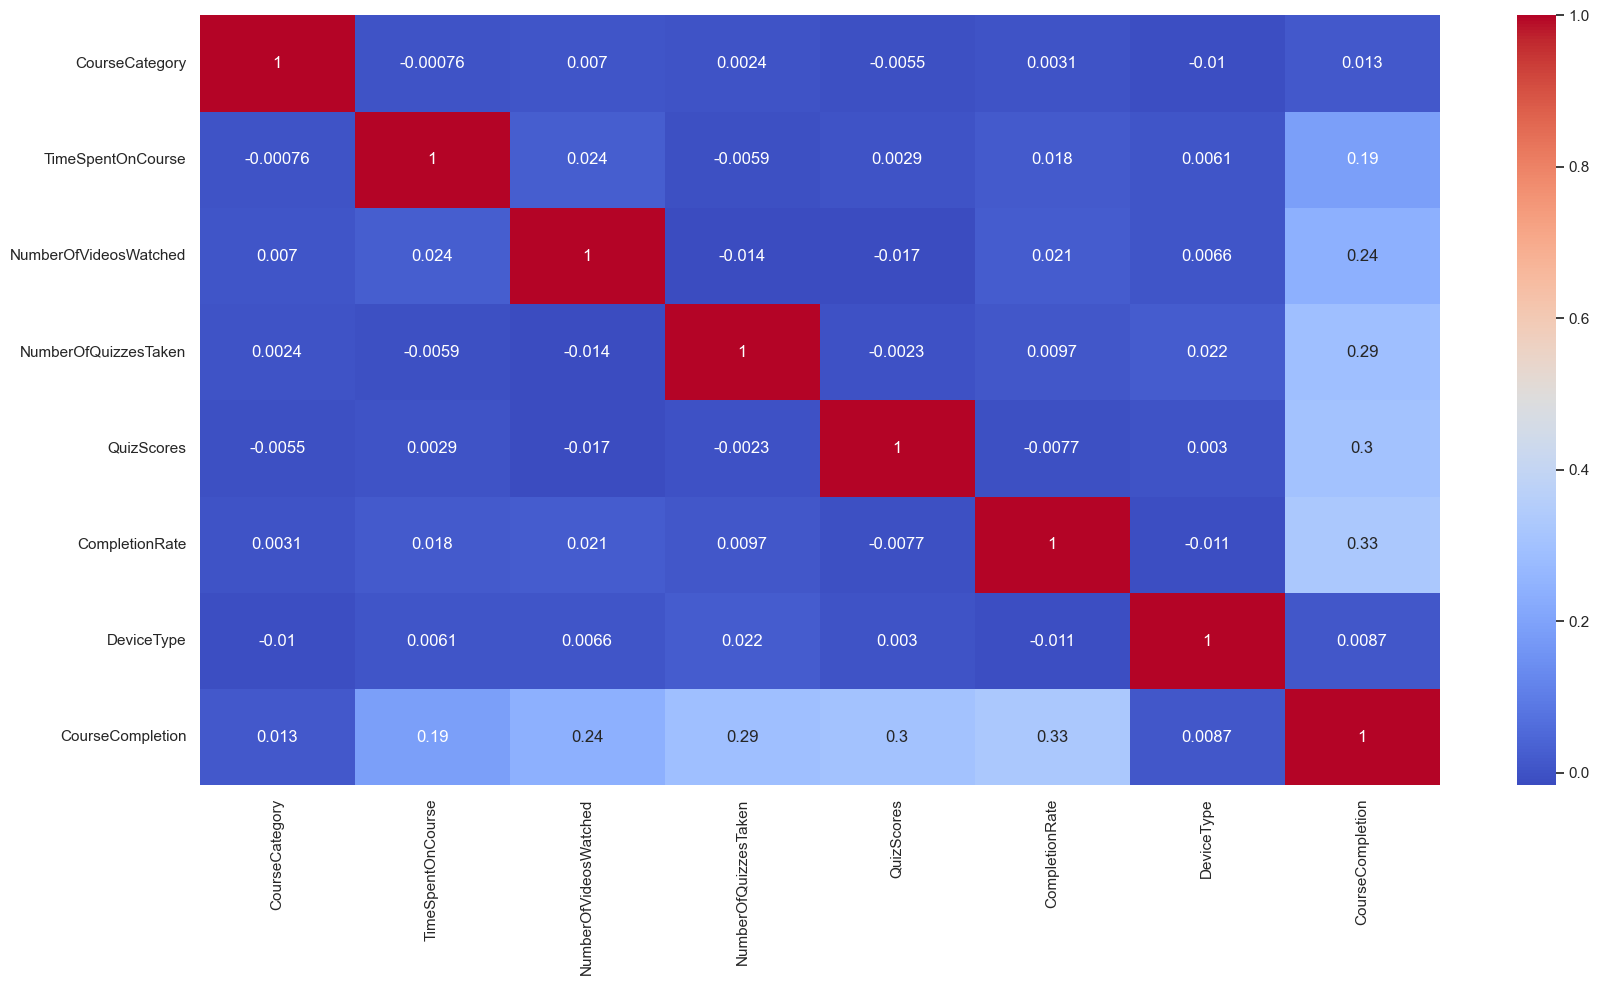

In [8]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linecolor='black')

In [9]:
#with this function we can select highly correlated  independent features 
#it will remove the first feature that is correlated with anything other feature 
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns 
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr 

In [10]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

In [11]:
numeric_col=["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

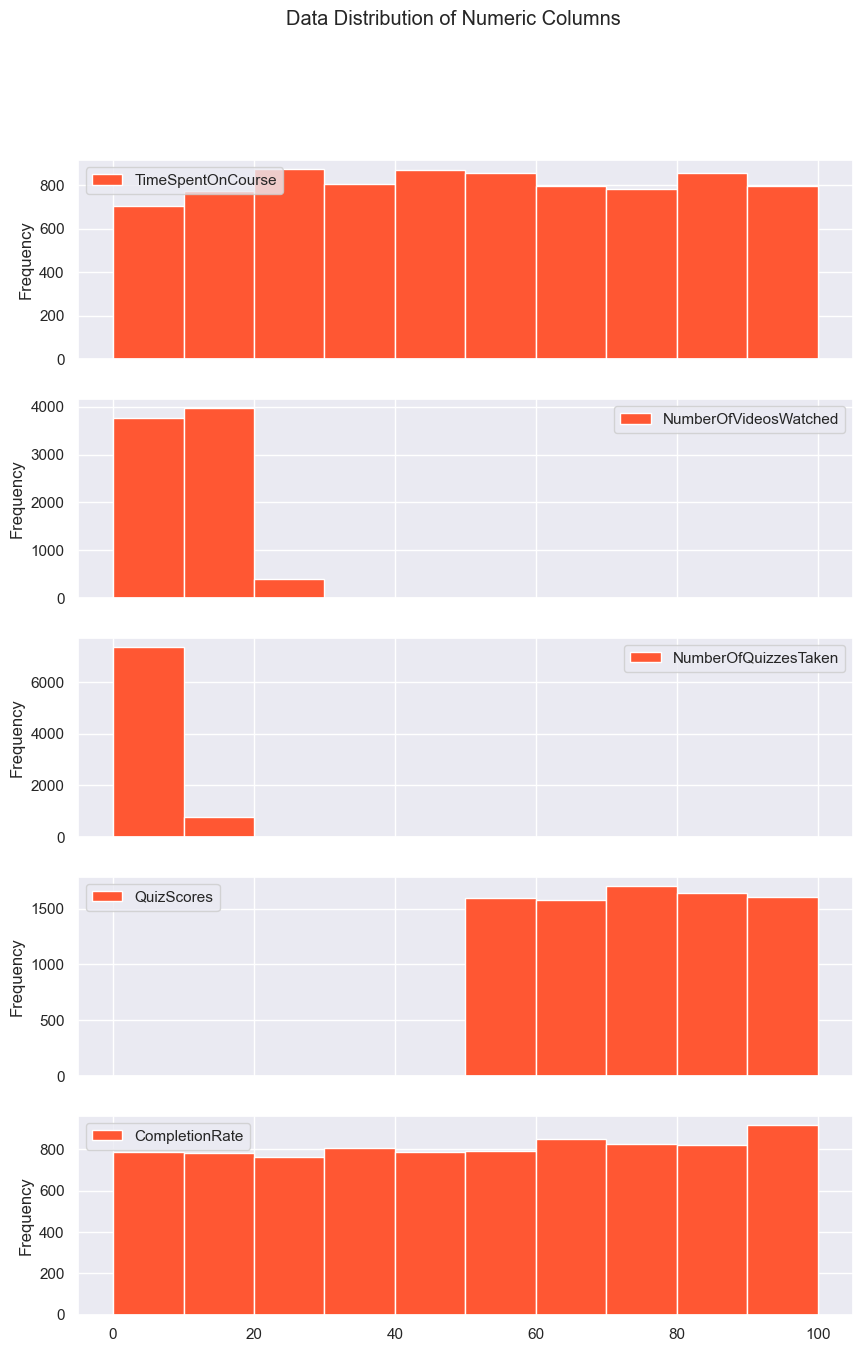

In [12]:


df[numeric_col].plot(kind='hist', 
                     subplots=True, 
                     title='Data Distribution of Numeric Columns', 
                     figsize=(10, 15), 
                     color='#ff5733')  # Change to your desired color



In [13]:
for col in numeric_col:
    fig = px.box(df, x=col, template="plotly_dark", width=700, height=300)
    fig.update_traces(marker=dict(color='#ff5733'))  # Change to your desired color
    fig.show()


In [14]:
for col in numeric_col:
    fig = px.histogram(df, col,             
                       color="CourseCompletion",histfunc="count",width=800,height=400
                       )

    fig.show()

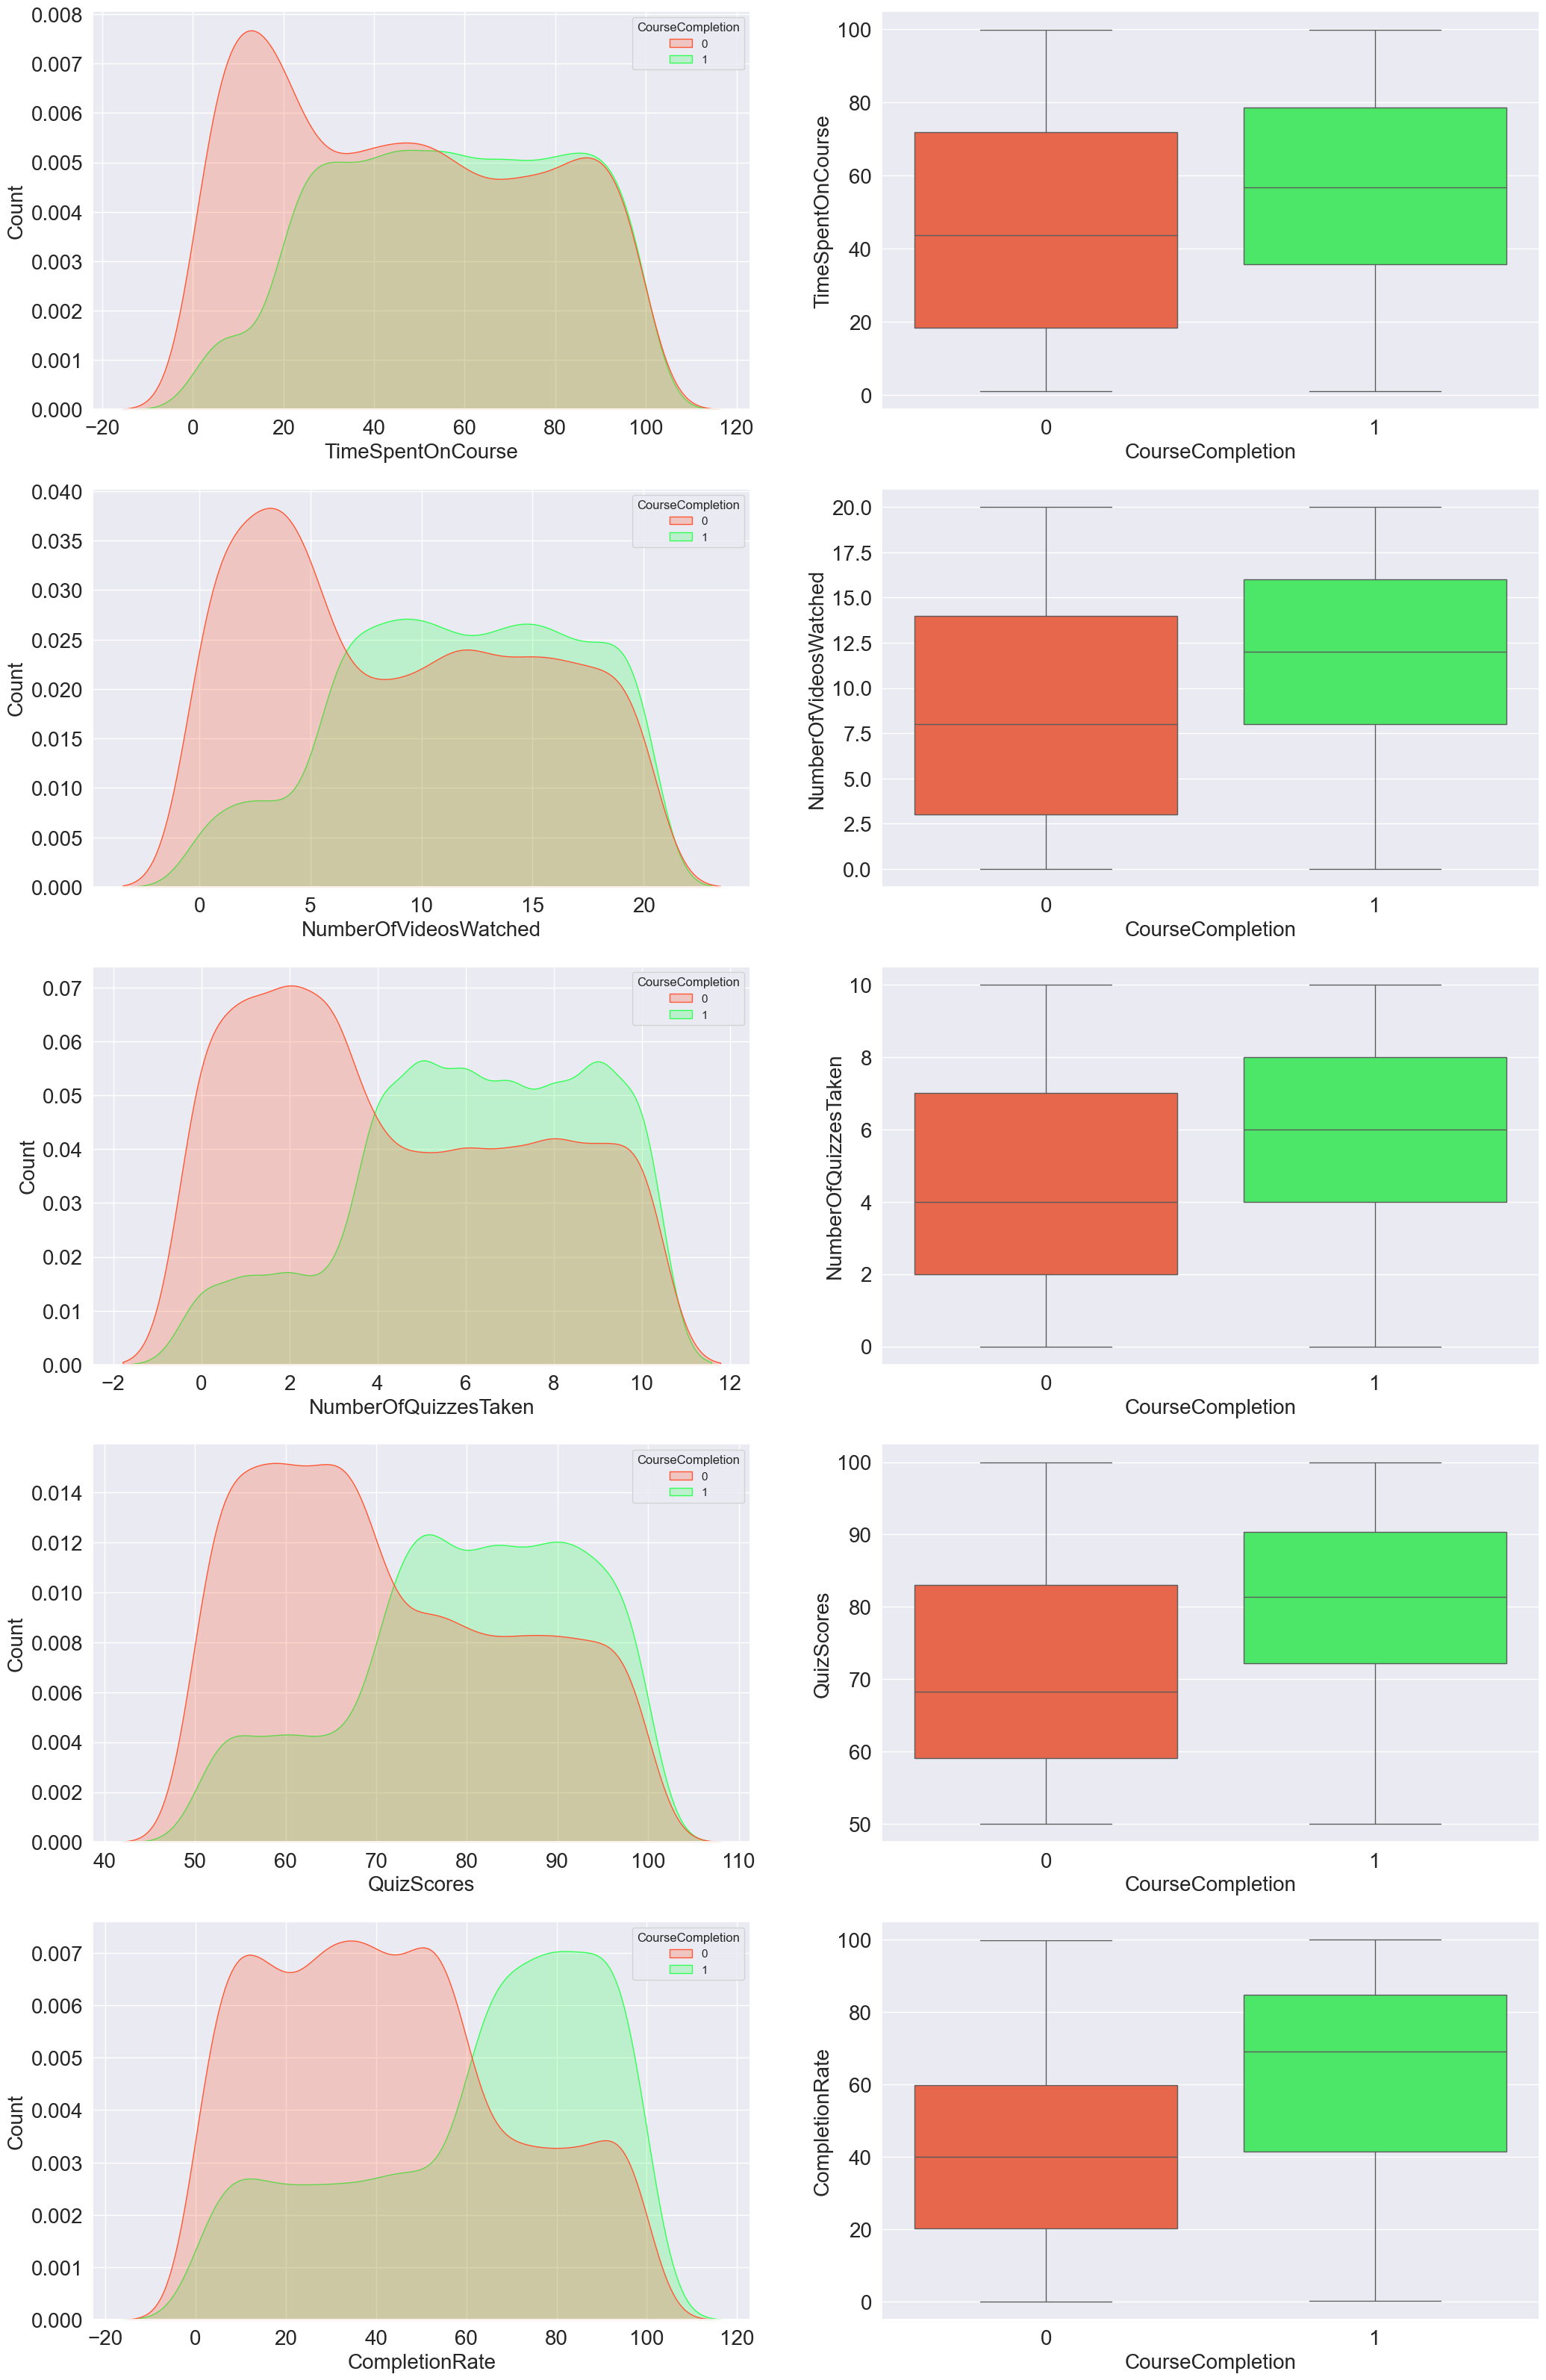

In [18]:


# Define your color palette
kde_palette = ['#ff5733', '#33ff57']  # Colors for the KDE plot
box_palette = ['#ff5733', '#33ff57']  # Colors for the Box plot

i = 1
plt.figure(figsize=(25, 90))

for col in numeric_col:
    # KDE Plot
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df, hue="CourseCompletion", x=col, fill=True, palette=kde_palette)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    i += 1
    
    # Box Plot
    plt.subplot(11, 2, i)
    sns.boxplot(x="CourseCompletion", y=col, data=df, palette=box_palette)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("CourseCompletion", fontsize=20)
    plt.ylabel(col, fontsize=20)
    i += 1

plt.show()


In [19]:
pd.DataFrame(df['CourseCompletion'].value_counts()).rename({"CourseCompletion":"Counts"}, axis = 1).rename_axis("CourseCompletion")

count
CourseCompletion       
0                  4555
1                  3568

In [20]:
# Calculate the value counts for CourseCompletion
value_counts = df['CourseCompletion'].value_counts().reset_index()
value_counts.columns = ['CourseCompletion', 'Count']

# Generate the count plot
fig = px.bar(value_counts, x='CourseCompletion', y='Count', text='Count', title='Course Completion Count Plot',
             color='CourseCompletion',width=700,height=400)

# Customize the layout
fig.update_layout(
    xaxis_title='Course Completion',
    yaxis_title='Count',
    template='plotly_dark'
)

# Show the figure
fig.show()

In [21]:
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "CourseCompletion",
             title = "<b>Counts in CourseCompletion</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

In [22]:
encoded_cat=["CourseCategory",'DeviceType']

In [23]:
# Calculate the value counts for CourseCategory
value_counts = df['CourseCategory'].value_counts().reset_index()
value_counts.columns = ['CourseCategory', 'Count']

# Generate the count plot
fig = px.bar(value_counts, x='CourseCategory', y='Count', text='Count', title='CourseCategory Count Plot',
             color='CourseCategory',width=700,height=400)

# Customize the layout
fig.update_layout(
    xaxis_title='CourseCategory',
    yaxis_title='Count',
    template='plotly_dark'
)

# Show the figure
fig.show()

In [24]:
# Calculate the value counts for CourseCategory
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "CourseCategory",
             title = "<b>Counts in CourseCategory</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

In [25]:
# Calculate the value counts for DeviceType
value_counts = df['DeviceType'].value_counts().reset_index()
value_counts.columns = ['DeviceType', 'Count']

# Generate the count plot
fig = px.bar(value_counts, x='DeviceType', y='Count', text='Count', title='DeviceType Count Plot',
             color='DeviceType',width=700,height=400)

# Customize the layout
fig.update_layout(
    xaxis_title='DeviceType',
    yaxis_title='Count',
    template='plotly_dark'
)

# Show the figure
fig.show()

In [26]:
# Calculate the value counts for CourseCategory
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "DeviceType",
             title = "<b>Counts in DeviceType</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

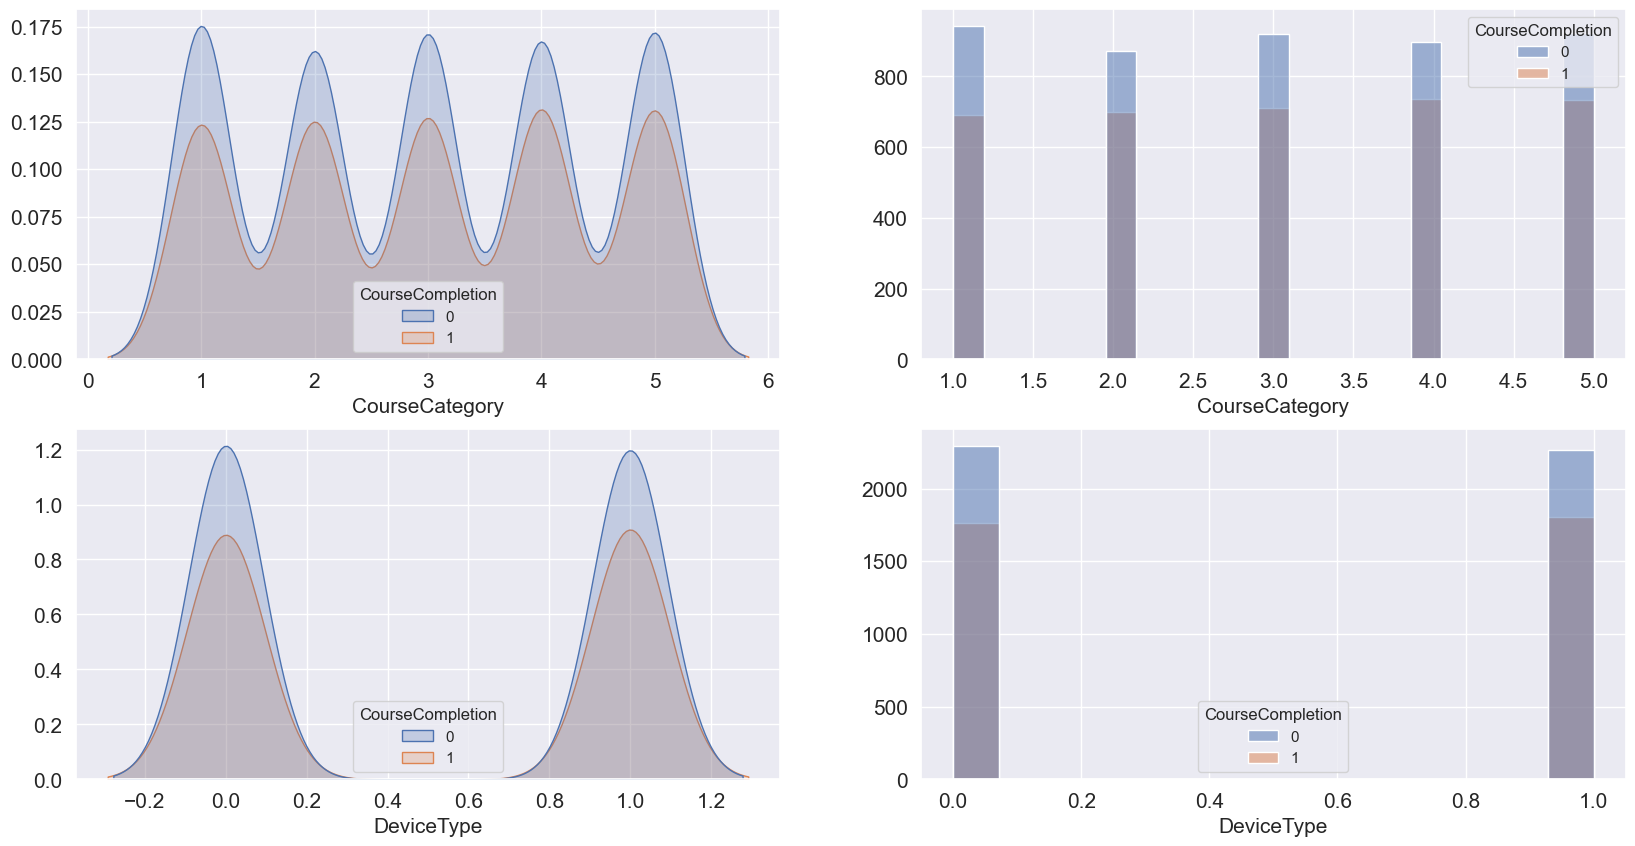

In [27]:
i=1
plt.figure(figsize=(20,10))
for col in encoded_cat:
    plt.subplot(2,2,i)
    sns.kdeplot(data=df,hue="CourseCompletion",x=col,shade = "fill")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("",fontsize=15)
    i=i+1
    plt.subplot(2,2,i)
    sns.histplot(data=df,hue="CourseCompletion",x=col)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("",fontsize=15)
    i=i+1

plt.show()

FEATURE ENGINEERING

In [28]:
# Get the features and target columns
X=df.iloc[:,0:-1]
y=df.CourseCompletion

In [29]:
X.head()

CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0               1          29.979719                     17   
1               2          27.802640                      1   
2               2          86.820485                     14   
3               3          35.038427                     17   
4               4          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  
0                     3   50.365656       20.860773           1  
1                     5   62.615970       65.632415           1  
2                     2   78.458962       63.812007           1  
3                    10   59.198853       95.433162           0  
4                     0   98.428285       18.102478           0

In [30]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: CourseCompletion, dtype: int64

In [31]:
#find the skewed col and fix them
    
skew_limit=0.75 # limit for skewed col
skew_vals=X[numeric_col].skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1    
# print("Columns names: ",skew_col.index)
print("\n")
print("Number of Skewed columns =",len(skew_col))
# plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1
        

plt.show()



Number of Skewed columns = 0


In [32]:
# Function to detect outliers in a given data series
def outlier(data):
    mean = data.mean()
    std = data.std()

    # Find the boundaries for outliers
    highest = mean + 3 * std
    lowest = mean - 3 * std

    # Find the outliers
    outliers = data[(data > highest) | (data < lowest)]

    return outliers

# Outliers detection and removal function for specified columns
def detect_and_remove_outliers(df, columns):
    outliers_df = pd.DataFrame()  # DataFrame to store outlier rows
    for col in columns:
        if col in df.columns:
            test = outlier(df[col])
            print("Column name:", col)
            print("Number of outliers:", len(test))
            print("\n")
            outliers_rows = df.loc[test.index]
            print("Outliers rows:")
#             print(outliers_rows)
#             print("<<<<<<<<<------------------------------------->>>>>>>>>")
#             print("\n")
            outliers_df = pd.concat([outliers_df, outliers_rows])
    
    # Drop outliers from the original DataFrame
    df = df.drop(outliers_df.index, axis=0)
    
    return df, outliers_df


numeric_cols = ["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]
cleaned_df, outliers = detect_and_remove_outliers(X, numeric_cols)

Column name: TimeSpentOnCourse
Number of outliers: 0


Outliers rows:
Column name: NumberOfVideosWatched
Number of outliers: 0


Outliers rows:
Column name: NumberOfQuizzesTaken
Number of outliers: 0


Outliers rows:
Column name: QuizScores
Number of outliers: 0


Outliers rows:
Column name: CompletionRate
Number of outliers: 0


Outliers rows:


In [33]:
df.sample(20)

CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
3122               3          89.836558                     14   
973                2          87.489748                     15   
6527               1          42.505676                     14   
7484               1          75.041333                      0   
4483               1          49.268971                     18   
7555               1          21.331450                      9   
4226               3          79.429486                      3   
6793               2          35.537348                     12   
631                5           1.389003                     12   
515                2          51.148450                      6   
7125               2          34.891074                      9   
1889               3          31.153415                     13   
5939               4          57.569728                     16   
1051               3          57.335611                     17   
2858               5          34.355269                     18   
2712               5          13.593208                      8   
6358               2           4.797794                      6   
6287               2          60.895303                      8   
5648               1          71.547539                     20   
7791               3          58.254581                     12   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
3122                     7   70.711439       52.745405           0   
973                      8   70.175286       12.305739           0   
6527                     4   61.184503       69.340205           0   
7484                     9   59.532871       13.889226           0   
4483                     3   83.995497       42.689178           1   
7555                    10   85.400907       28.899199           1   
4226                    10   58.127872       16.290561           1   
6793                     6   74.053658       17.276089           0   
631                      7   86.393822        6.793955           0   
515                      4   63.372206       10.017775           0   
7125                    10   79.256322       74.485953           0   
1889                     3   71.423327       15.378256           1   
5939                     4   51.321505       79.234972           1   
1051                     0   96.208348        4.307279           1   
2858                     4   84.285961       72.569660           0   
2712                     5   90.734773       56.152609           1   
6358                     5   55.987217       51.816635           0   
6287                     0   76.821862        9.864935           1   
5648                     7   84.806975       95.460051           0   
7791                     9   54.370975       19.156934           1   

      CourseCompletion  
3122                 0  
973                  1  
6527                 1  
7484                 0  
4483                 1  
7555                 1  
4226                 0  
6793                 1  
631                  0  
515                  0  
7125                 1  
1889                 0  
5939                 1  
1051                 0  
2858                 1  
2712                 0  
6358                 0  
6287                 0  
5648                 1  
7791                 0

Model training and testing 

In [34]:
#split the data train and test
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (6498, 7)
X_test shape:  (1625, 7)

Y_train shape:  (6498,)
Y_test shape:  (1625,)


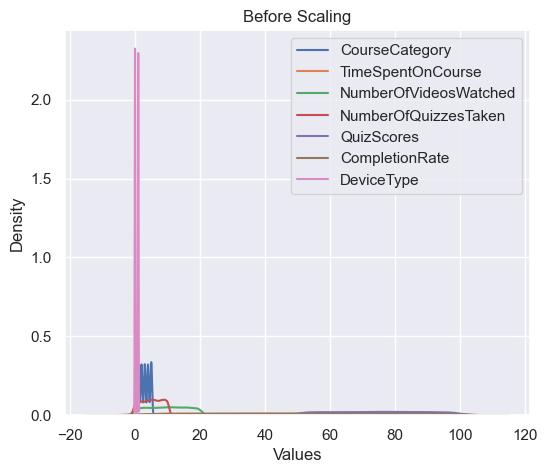

In [35]:
plt.figure(figsize=(6, 5))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

feature scaling using standard scaler

In [36]:

sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0       -0.715858          -1.485071               0.314404   
1        0.692664          -0.467131              -0.355266   
2        0.692664          -0.249802              -0.187849   
3       -1.420119          -1.413606               0.314404   
4       -0.011597           0.707128              -0.187849   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  
0             -1.337705    0.198678        1.617997   -0.993863  
1              0.261399    0.496907        0.761615    1.006175  
2              0.581219    0.457444       -1.302491    1.006175  
3             -1.337705   -0.062470        0.473777    1.006175  
4              1.220861   -0.347259       -1.158589    1.006175

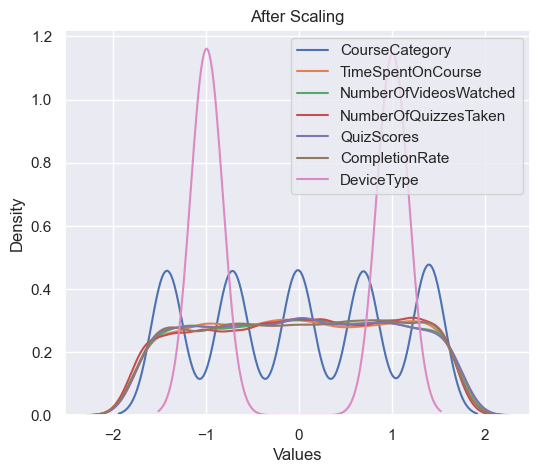

In [37]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

model creation


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc


def models_score(models, X_train, X_test, y_train, y_test):    
    scores = {}
    test_scores = {}
    train_scores = {}
    precision = {}
    recall = {}
    f1 = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        # Storing scores
        test_scores[name] = accuracy_score(y_test, y_pred)
        train_scores[name] = accuracy_score(y_train, y_pred_train)
        precision[name] = precision_score(y_test, y_pred, average='weighted')
        recall[name] = recall_score(y_test, y_pred, average='weighted')
        f1[name] = f1_score(y_test, y_pred, average='weighted')
        
        # Printing the model name and accuracy
        print(f"Model name: {name}")
        print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
        
        # Printing classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        

        print(f"Precision: {precision[name]}, Recall: {recall[name]}, F1 Score: {f1[name]}\n")
        print()
        
        # Plotting the confusion matrix
        print("Confusion Matrix:")
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{name} Confusion Matrix")
        plt.show()
        
        # Plotting ROC curve for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = len(set(y_test))

        # Compute ROC curve and ROC area for each class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure(figsize=(6, 4))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        
        print("\n<<<<------------------------------------------------------------->>>>\n")
    
    # Consolidating scores into a DataFrame
    model_scores = pd.DataFrame({
        'Test Accuracy': test_scores,
        'Train Accuracy': train_scores,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    return model_scores

In [39]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradiantBoost": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XgBoost": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

Model name: LogisticRegression
Train Accuracy: 0.7910126192674669
Test Accuracy: 0.7926153846153846

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       894
           1       0.79      0.74      0.76       731

    accuracy                           0.79      1625
   macro avg       0.79      0.79      0.79      1625
weighted avg       0.79      0.79      0.79      1625

Precision: 0.7923036908530514, Recall: 0.7926153846153846, F1 Score: 0.7919479898802849


Confusion Matrix:


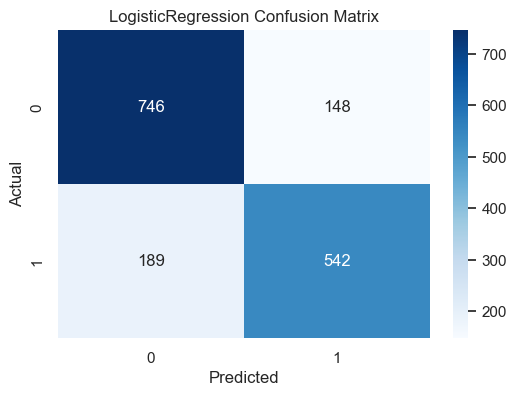

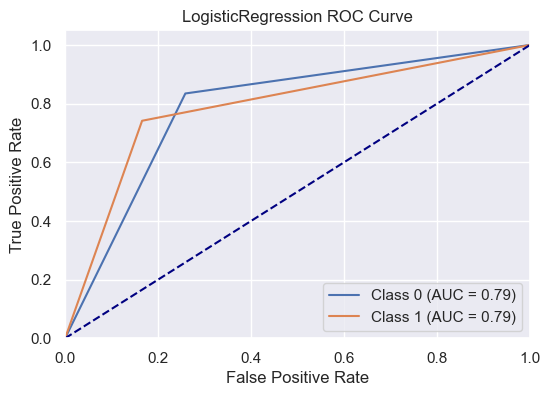


<<<<------------------------------------------------------------->>>>

Model name: SVC
Train Accuracy: 0.8871960603262542
Test Accuracy: 0.8713846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       894
           1       0.88      0.82      0.85       731

    accuracy                           0.87      1625
   macro avg       0.87      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625

Precision: 0.8721441404657897, Recall: 0.8713846153846154, F1 Score: 0.8708169952923641


Confusion Matrix:


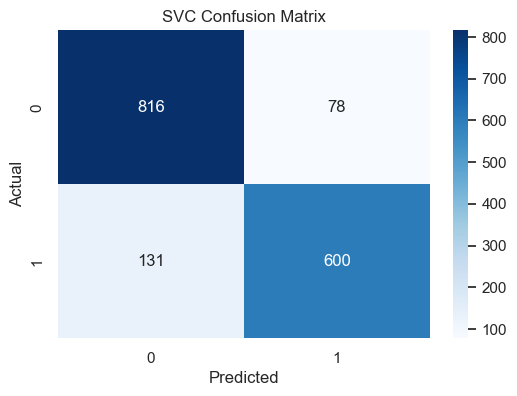

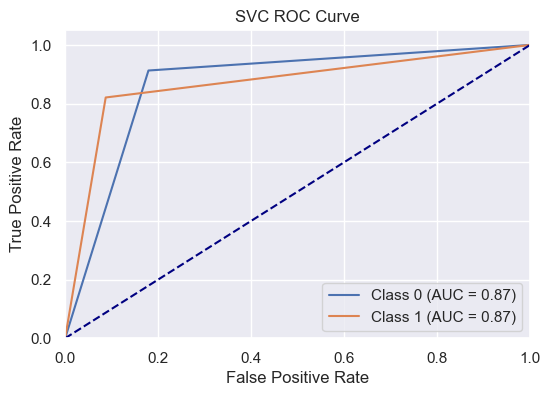


<<<<------------------------------------------------------------->>>>

Model name: DecisionTree
Train Accuracy: 1.0
Test Accuracy: 0.9138461538461539

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       894
           1       0.90      0.91      0.90       731

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Precision: 0.913933291395978, Recall: 0.9138461538461539, F1 Score: 0.9138771774194119


Confusion Matrix:


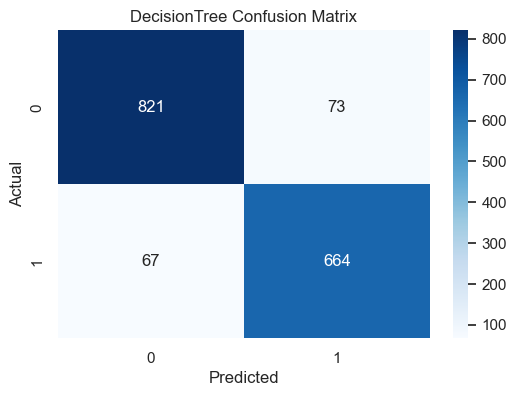

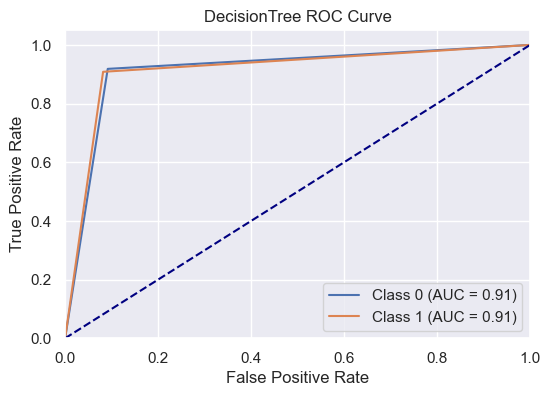


<<<<------------------------------------------------------------->>>>

Model name: AdaBoost
Train Accuracy: 0.953678054786088
Test Accuracy: 0.9532307692307692

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       894
           1       0.96      0.93      0.95       731

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Precision: 0.9535503498659835, Recall: 0.9532307692307692, F1 Score: 0.9531425417951326


Confusion Matrix:


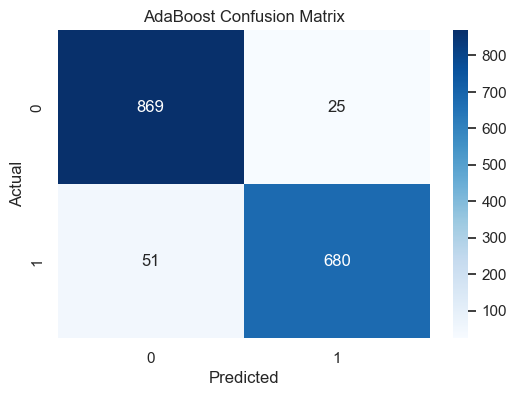

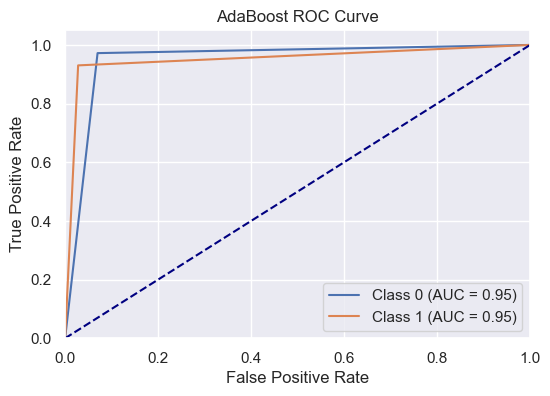


<<<<------------------------------------------------------------->>>>

Model name: GradiantBoost
Train Accuracy: 0.9592182209910741
Test Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precision: 0.9603814406277762, Recall: 0.96, F1 Score: 0.9599212140409481


Confusion Matrix:


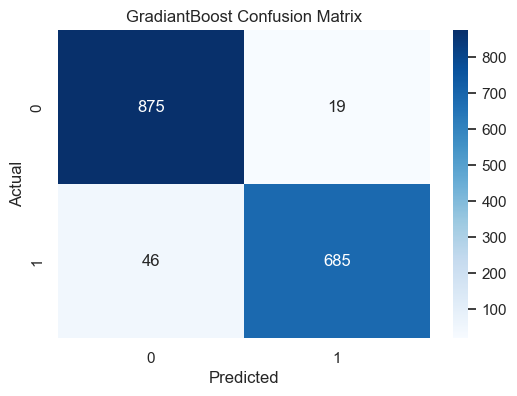

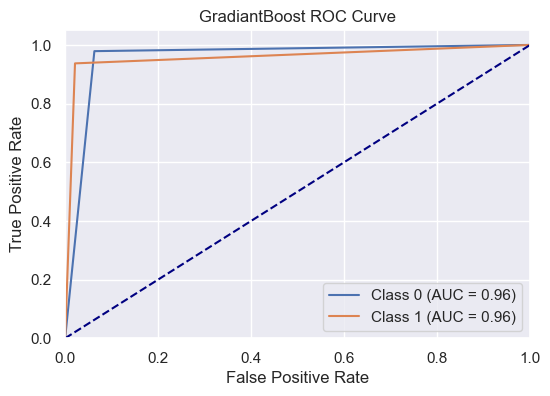


<<<<------------------------------------------------------------->>>>

Model name: RandomForest
Train Accuracy: 1.0
Test Accuracy: 0.9593846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precision: 0.9597307146753956, Recall: 0.9593846153846154, F1 Score: 0.9593079968220888


Confusion Matrix:


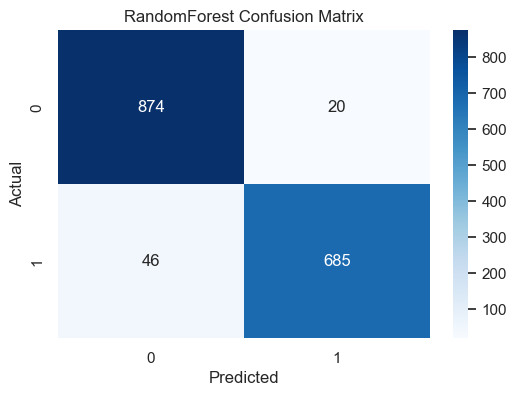

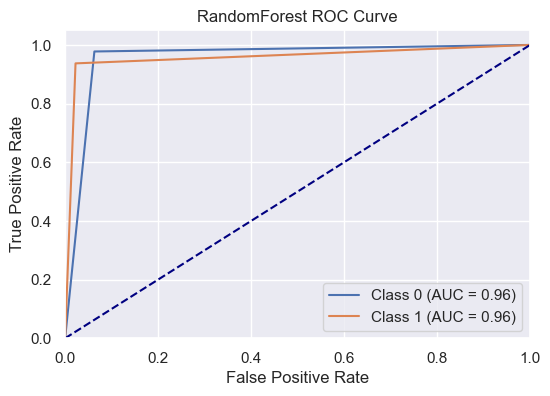


<<<<------------------------------------------------------------->>>>

Model name: XgBoost
Train Accuracy: 0.9958448753462604
Test Accuracy: 0.9563076923076923

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       894
           1       0.97      0.93      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precision: 0.9566100427976159, Recall: 0.9563076923076923, F1 Score: 0.956228870159082


Confusion Matrix:


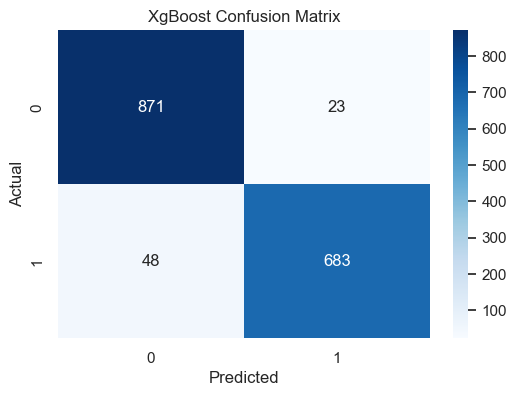

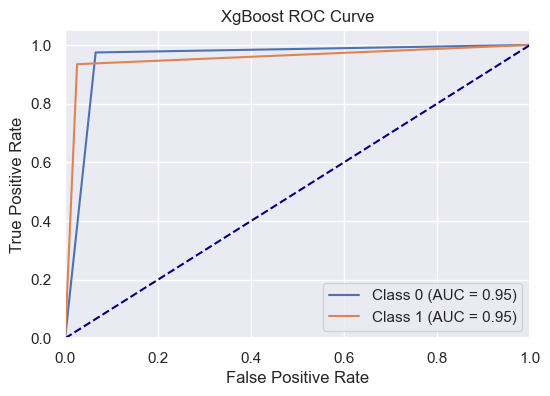


<<<<------------------------------------------------------------->>>>

Model name: KNeighborsClassifier
Train Accuracy: 0.9081255771006463
Test Accuracy: 0.8547692307692307

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       894
           1       0.85      0.82      0.84       731

    accuracy                           0.85      1625
   macro avg       0.85      0.85      0.85      1625
weighted avg       0.85      0.85      0.85      1625

Precision: 0.854632667090856, Recall: 0.8547692307692307, F1 Score: 0.8545424469943806


Confusion Matrix:


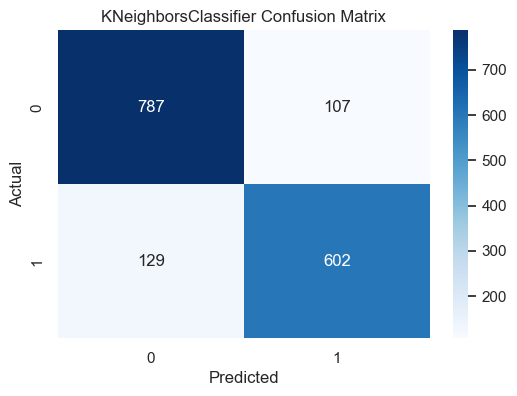

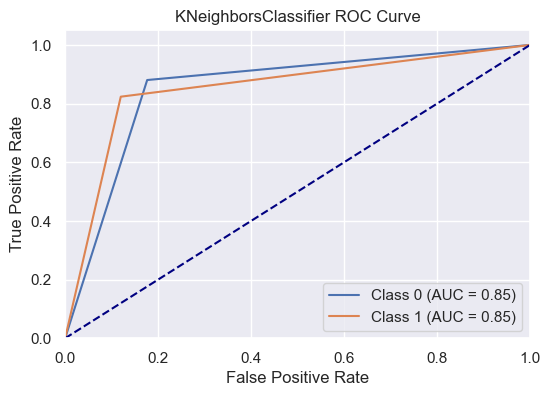


<<<<------------------------------------------------------------->>>>



In [40]:
# calling function to evaluate models
scores = models_score(models, x_train, x_test, y_train, y_test)